In [61]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_csv("../dataset/penguins.csv")  # Adjust path if needed

# Display first few rows
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


### Preprocessing

In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna().reset_index(drop=True)

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [5]:
selected_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]
df_selected = df[selected_features]

In [7]:
df_sample = df_selected.sample(n=100, random_state=42).reset_index(drop=True)

# Display the sample dataset
df_sample.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,40.5,18.9,180.0
1,39.6,20.7,191.0
2,42.9,17.6,196.0
3,49.8,17.3,198.0
4,37.6,17.0,185.0


#### Data scaling

In [158]:
df_sample = (df_sample - df_sample.min()) / (df_sample.max() - df_sample.min()) * 9 + 1

In [24]:
df_sample.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,3.492958,7.0750,1.014913
1,3.112676,9.1000,1.035418
2,4.507042,5.6125,1.044739
3,7.422535,5.2750,1.048467
4,2.267606,4.9375,1.024234


In [28]:
df_sample.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
count,100.000000,100.000000,100.000000
mean,4.819718,5.279500,1.143295
std,2.319473,2.166692,0.895049
min,1.000000,1.000000,1.000000
25%,2.816901,3.784375,1.033088
50%,4.422535,5.443750,1.045671
75%,6.492958,6.878125,1.078293
max,10.000000,10.000000,10.000000


### initialize random centroids

In [45]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = df_sample.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

### Label each data point - cluster assignments

In [74]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

### Update centroids

In [86]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

### Data visualization

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [152]:
def plot_clusters(data, labels, centroids, iteration):
    # transform the data into 2d data
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    # visualize the data
    plt.title(f'Iteration {iteration}')
    plt.scatter(x = data_2d[:,0], y = data_2d[:,1], c = labels)
    plt.scatter(x = centroids_2d[:, 0], y = centroids_2d[:,1])
    plt.show()

# K means algorithm

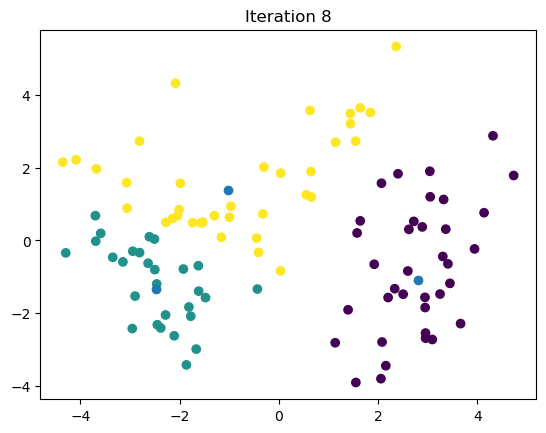

In [155]:
max_iterations = 100
k = 3

centroids = random_centroids(df_sample, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(df_sample, centroids)
    centroids = new_centroids(df_sample, labels, k)
    plot_clusters(df_sample, labels, centroids, iteration)
    iteration += 1

In [127]:
centroids

,0,1,2
culmen_length_mm,7.469514,2.681497,5.628062
culmen_depth_mm,5.490407,6.263327,2.017135
flipper_length_mm,1.067019,1.081295,1.082061
